# Population of Turkey's provinces and Izmir's town
In this projest, population of 81 province in Turkey will be shown as Turkey's map. Chlorap will be used.
Similarly population of İzmir's towns will be shown.
- Population of each province will be taken from excel file.
- populations will be inserted into Turkey's geodataframe from Turkeys province shape file.
- Province names and populations will be placed on the map  

** To Do **  
-Bozuk il isimlerini lookup tablosundan değiştirmek  
-Şehir merkezlerini nokta olarak haritaya işlemek  
-Şehir isimlerini haritaya ekle

In [164]:
%matplotlib inline

import pandas as pd
import geopandas

# pd.options.display.max_rows = 10

## Maps and shape files
gadm36_TUR_0.shp Turkey in general  
gadm36_TUR_0.shp Turkey/provinces  
gadm36_TUR_0.shp Turkey/towns  
https://gadm.org/index.html shape files can be download.

In [170]:
provinces = geopandas.read_file("data/gadm36_TUR_1.shp", encoding = 'utf-8')
provinces = provinces[['NAME_1','geometry']]
provinces = provinces.rename(columns={'NAME_1': 'province'})

In [181]:
provinces.replace('Zinguldak', 'Zonguldak')

,province,geometry
0,Adana,"(POLYGON ((35.20958328 36.67874908, 35.2095832..."
1,Adiyaman,"POLYGON ((38.68339157 37.60322571, 38.66181564..."
2,Afyon,"POLYGON ((30.18260765 37.90116119, 30.18877983..."
3,Agri,"POLYGON ((43.71635437 39.37020493, 43.7074585 ..."
4,Aksaray,"POLYGON ((34.39512634 38.19466782, 34.39625931..."
...,...,...
76,Usak,"POLYGON ((29.5759182 38.19177246, 29.56290054 ..."
77,Van,"POLYGON ((44.49154282 38.30872726, 44.49103165..."
78,Yalova,"POLYGON ((29.03236198 40.4785881, 29.03236198 ..."
79,Yozgat,"POLYGON ((35.96196365 39.91003418, 35.96332932..."


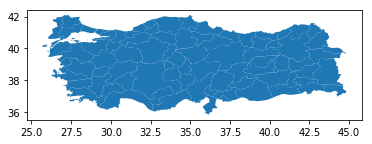

In [176]:
provinces.plot()

Change coordinate system
CRS

## Load population from TUIK
Read from csv file take from TUIK website https://biruni.tuik.gov.tr/medas/  
-skip 5 rows since they are scrambled from source

In [138]:
df = pd.read_csv("data/turkey_population.csv", sep='|', usecols=["year", "province", "population"]
                , index_col=False, header=None, skiprows=5, encoding = 'utf-8'
                , names=['year', 'province', 'population', 'value'])

There are NaN values on year column so it should ve filled with previous column.  
Last row is added from a empty line is csv so it should be removed

In [139]:
df=df.fillna(method='ffill')
df=df[:-1]

## Data clean up
- convert year and population to integer
- clean province text / split text for '-' and take the first element

In [140]:
df[['year','population']] = df[['year','population']].astype(int)
df['province']=df['province'].str.split('-',expand=True)[0]

In [150]:
df_year2017 = df.loc[df['year'] == 2017]
df_year2017

,year,province,population
810,2017,Adana,2216475
811,2017,Adıyaman,615076
812,2017,Afyonkarahisar,715693
813,2017,Ağrı,536285
814,2017,Aksaray,402404
...,...,...,...
886,2017,Uşak,364971
887,2017,Van,1106891
888,2017,Yalova,251203
889,2017,Yozgat,418650


In [182]:
province_pop = pd.merge(provinces, df_year2017, on='province', how='outer')
province_pop.to_csv("data/turkey_population_new.csv", encoding = 'utf-8')
province_pop

,province,geometry,year,population
0,Adana,"(POLYGON ((35.20958328 36.67874908, 35.2095832...",2017.0,2216475.0
1,Adiyaman,"POLYGON ((38.68339157 37.60322571, 38.66181564...",NaN,NaN
2,Afyon,"POLYGON ((30.18260765 37.90116119, 30.18877983...",NaN,NaN
3,Agri,"POLYGON ((43.71635437 39.37020493, 43.7074585 ...",NaN,NaN
4,Aksaray,"POLYGON ((34.39512634 38.19466782, 34.39625931...",2017.0,402404.0
...,...,...,...,...
100,Şanlıurfa,NaN,2017.0,1985753.0
101,Şırnak,NaN,2017.0,503236.0
102,Tekirdağ,NaN,2017.0,1005463.0
103,Uşak,NaN,2017.0,364971.0


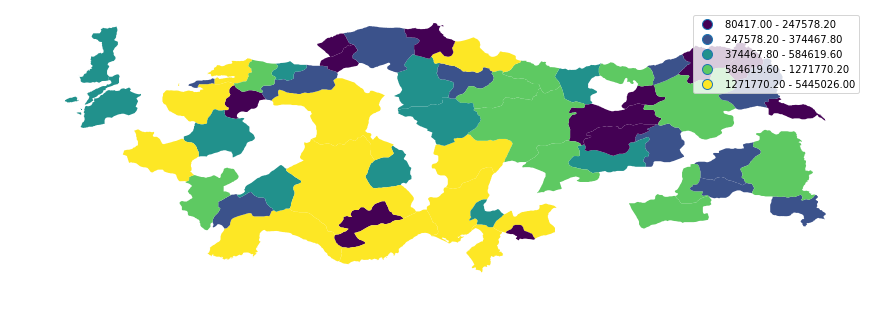

In [178]:
ax = province_pop.plot(figsize=(15, 15), column='population', scheme='quantiles', legend=True)
ax.set_axis_off()